## LR13

### 1. Load Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

### 2. Load synthetic dataset using make_classification

In [2]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=2, n_redundant=10, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.80, random_state=124
)

### 3. Fit Logistic Regression Model

In [3]:
lr = LogisticRegression()

model_lr = lr.fit(X_train,y_train)

In [4]:
y_pred = model_lr.predict(X_test)

y_pred

array([0, 1, 0, ..., 0, 0, 1])

### 4. Model evaluation

In [5]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[34762,  5223],
       [ 5332, 34683]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

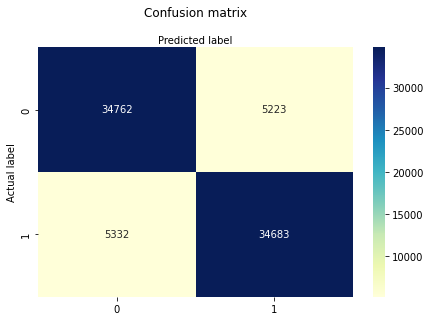

In [6]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Question LR13

Question: Part(a): Now that we have computed confusion matrix above, please plot the ROC AUC chart below

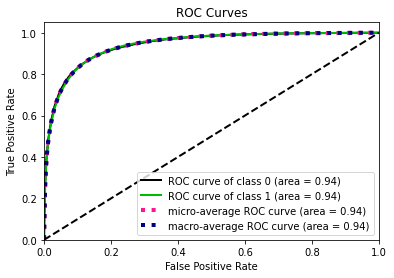

In [7]:
import scikitplot as skplt
y_prob = model_lr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)
#y_prob
plt.show()

Question: Part(b): Compute Youden J Statistics

In [8]:
# https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1], drop_intermediate=False)
def cutoff_youdens_j(fpr, tpr, thresholds):
    j_scores = tpr - fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]
cutoff_youdens_j(fpr, tpr, thresholds)

0.49429055587188697